# Navigating Loan Approval

## Business Understanding

Differentiating which loan requests to approve can be a slow process, but it is one which is absolutely necessary in order to prevent large losses on defaulted loans. In the current, manual approval workflow, the process can be time-consuming and the results inconsistent. In order to speed up the process and standardize the results, we can create a predictive model to identify which loans are safe to approve. We want to be extremely careful about false positives, as a defaulted loan is very costly compared to the cost of a false negatice when decising which loans to approve. For that reason, we will prioritize precision in our model creation.

We will be using a classification approach to easily streamline the process of deciding which loans to approve and which to deny.

In [6]:
primary_metric = 'precision'

## Data Understanding
3. Conduct comprehensive exploratory data analysis:
- Describe basic data characteristics
- Examine distributions of all features and target variables
- Investigate relationships between features
- Create visualizations to help aid in EDA
- Document potential data quality issues and their implications

4. Develop feature understanding:
- Categorize features by type (numerical, categorical, ordinal)
- Identify features requiring special preprocessing
- Document missing value patterns and their potential meanings
- Note potential feature engineering opportunities


In [207]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay, precision_score
import warnings
warnings.filterwarnings('ignore')

In [231]:
# EDA Code Here - Create New Cells As Needed

data = pd.read_csv('financial_loan_data.csv')
data = data.drop('RiskScore', axis=1)

data.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,45,"$39,948.00",617,Employed,Master,22,13152,48,Married,2,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0
1,38,"$39,709.00",628,Employed,Associate,15,26045,48,Single,1,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0
2,47,"$40,724.00",570,Employed,Bachelor,26,17627,36,NaN,2,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0
3,58,"$69,084.00",545,Employed,High School,34,37898,96,Single,1,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0
4,37,"$103,264.00",594,Employed,Associate,17,9184,36,Married,1,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1


In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         20000 non-null  int64  
 1   AnnualIncome                20000 non-null  object 
 2   CreditScore                 20000 non-null  int64  
 3   EmploymentStatus            20000 non-null  object 
 4   EducationLevel              19099 non-null  object 
 5   Experience                  20000 non-null  int64  
 6   LoanAmount                  20000 non-null  int64  
 7   LoanDuration                20000 non-null  int64  
 8   MaritalStatus               18669 non-null  object 
 9   NumberOfDependents          20000 non-null  int64  
 10  HomeOwnershipStatus         20000 non-null  object 
 11  MonthlyDebtPayments         20000 non-null  int64  
 12  CreditCardUtilizationRate   20000 non-null  float64
 13  NumberOfOpenCreditLines     200

In [233]:
data.isna().sum()

Age                              0
AnnualIncome                     0
CreditScore                      0
EmploymentStatus                 0
EducationLevel                 901
Experience                       0
LoanAmount                       0
LoanDuration                     0
MaritalStatus                 1331
NumberOfDependents               0
HomeOwnershipStatus              0
MonthlyDebtPayments              0
CreditCardUtilizationRate        0
NumberOfOpenCreditLines          0
NumberOfCreditInquiries          0
DebtToIncomeRatio                0
BankruptcyHistory                0
LoanPurpose                      0
PreviousLoanDefaults             0
PaymentHistory                   0
LengthOfCreditHistory            0
SavingsAccountBalance          572
CheckingAccountBalance           0
TotalAssets                      0
TotalLiabilities                 0
MonthlyIncome                    0
UtilityBillsPaymentHistory       0
JobTenure                        0
NetWorth            

In [78]:
data['EducationLevel'].unique()

array(['Master', 'Associate', 'Bachelor', 'High School', nan, 'Doctorate'],
      dtype=object)

In [79]:
data['MaritalStatus'].unique()

array(['Married', 'Single', nan, 'Divorced', 'Widowed'], dtype=object)

In [80]:
data['LoanApproved'].unique()

array([0, 1])

In [81]:
data['LoanPurpose'].unique()

array(['Home', 'Debt Consolidation', 'Education', 'Other', 'Auto'],
      dtype=object)

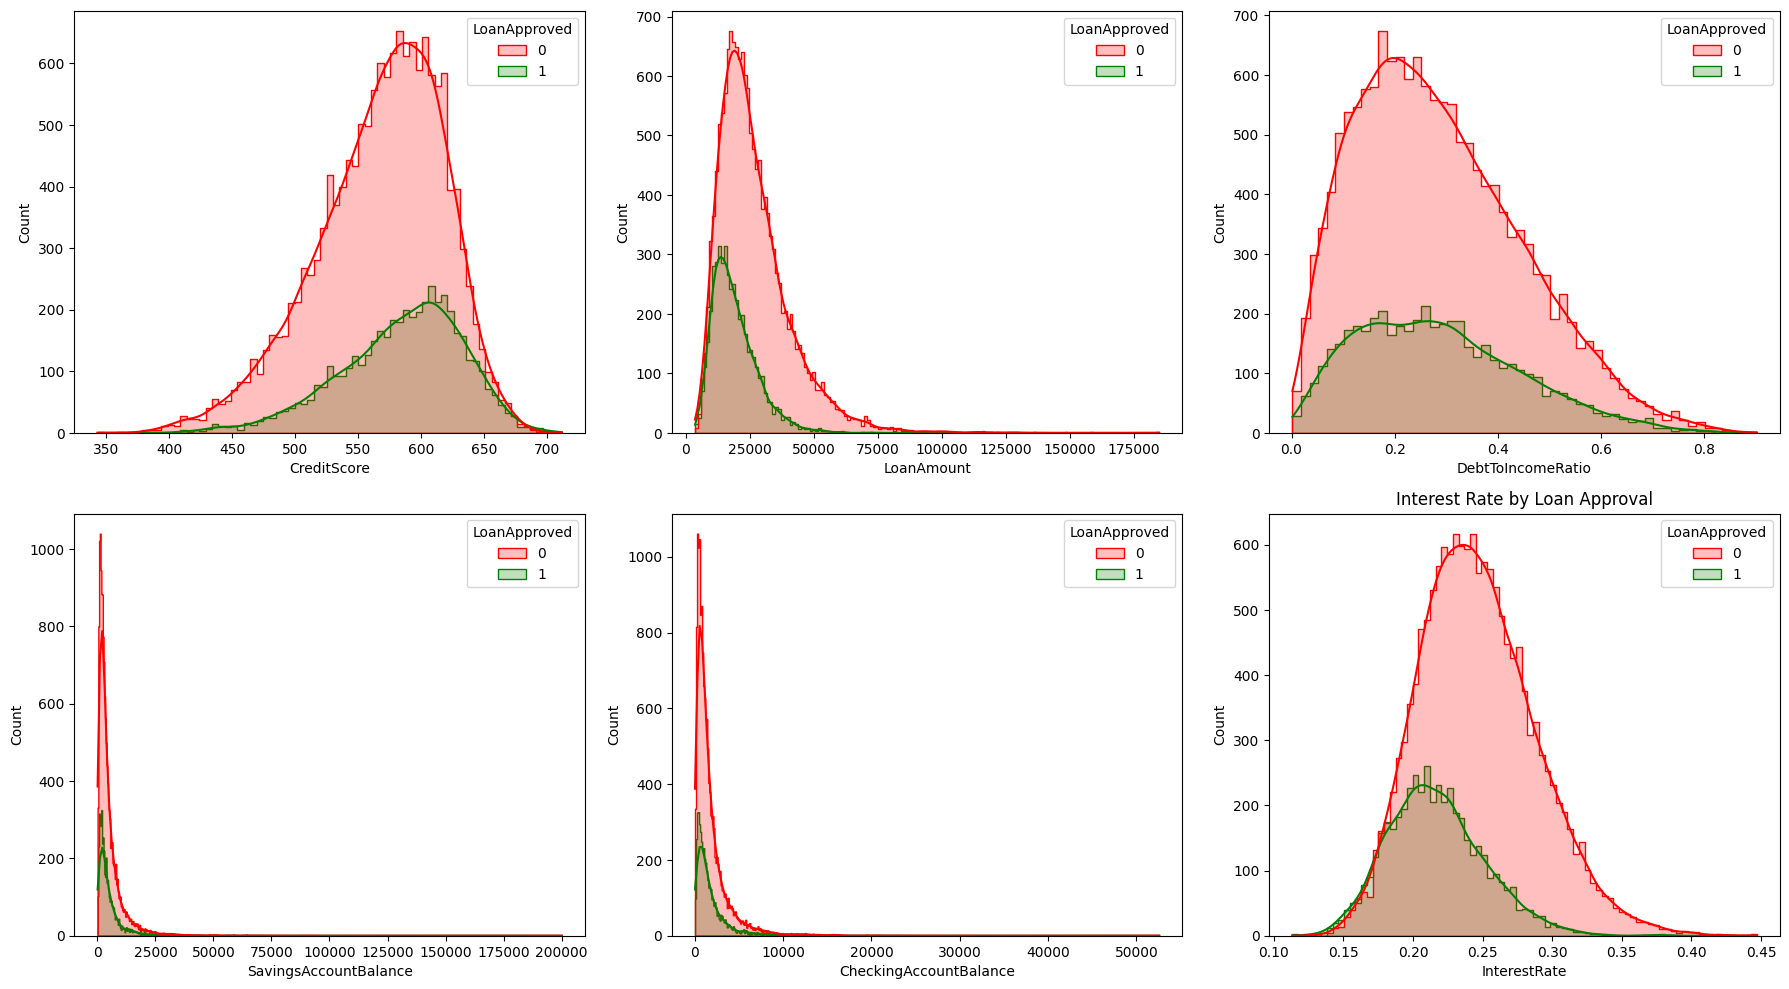

In [210]:
# Visualize numeric feature relations
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Create subplots for each numerica feature
sns.histplot(ax=axs[0,0], data=data, x='CreditScore', hue='LoanApproved', kde=True, element='step', palette=['red', 'green'])
plt.title('Credit Score by Loan Approval')

sns.histplot(ax=axs[0,1], data=data, x='LoanAmount', hue='LoanApproved', kde=True, element='step', palette=['red', 'green'])
plt.title('Loan Amount by Loan Approval')

sns.histplot(ax=axs[0,2], data=data, x='DebtToIncomeRatio', hue='LoanApproved', kde=True, element='step', palette=['red', 'green'])
plt.title('Debt to Income Ratio by Loan Approval')

sns.histplot(ax=axs[1,0], data=data, x='SavingsAccountBalance', hue='LoanApproved', kde=True, element='step', palette=['red', 'green'])
plt.title('Savings Account Balance by Loan Approval')

sns.histplot(ax=axs[1,1], data=data, x='CheckingAccountBalance', hue='LoanApproved', kde=True, element='step', palette=['red', 'green'])
plt.title('Checking Account Balance by Loan Approval')

sns.histplot(ax=axs[1,2], data=data, x='InterestRate', hue='LoanApproved', kde=True, element='step', palette=['red', 'green'])
plt.title('Interest Rate by Loan Approval')

plt.tight_layout()
plt.show()

## Data Preparation
5. Design your preprocessing strategy:
- Create separate preprocessing flows for different feature types
- Must utilize ColumnTransformer and Pipeline
- Consider using FeatureUnion as well
- Handle missing values appropriately for each feature
- Handle Categorical and Ordinal data appropriately
- Scale numeric values if model requires it (linear model)
- Document your reasoning for each preprocessing decision



In [238]:
# While I tried to make a custom transformer for this transformation, it lead to constant bugs.
# To be able to move on with the model, I am performing this independently.
data['AnnualIncome'] = data['AnnualIncome'].str[1:]
data['AnnualIncome'] = data['AnnualIncome'].str.replace(',','')
data['AnnualIncome'] = data['AnnualIncome'].astype(float)

In [239]:
# Data Prep Code Here - Create New Cells As Needed
numeric_features = [
    'Age',
    'AnnualIncome',
    'CreditScore',
    'LoanAmount',
    'LoanDuration',
    'NumberOfDependents',
    'MonthlyDebtPayments',
    'CreditCardUtilizationRate',
    'NumberOfOpenCreditLines',
    'NumberOfCreditInquiries',
    'DebtToIncomeRatio',
    'PaymentHistory',
    'LengthOfCreditHistory',
    'SavingsAccountBalance',
    'CheckingAccountBalance',
    'TotalAssets',
    'TotalLiabilities',
    'MonthlyIncome',
    'UtilityBillsPaymentHistory',
    'JobTenure',
    'NetWorth',
    'BaseInterestRate',
    'InterestRate',
    'MonthlyLoanPayment',
    'TotalDebtToIncomeRatio',
    ]


categorical_features = [
    'EmploymentStatus',
    'EducationLevel',
    'MaritalStatus',
    'BankruptcyHistory',
    'LoanPurpose',
    'PreviousLoanDefaults',
    'HomeOwnershipStatus'
]

def convert_income(df):
    # Convert annual income from a string to a float
    df = df.copy()
    df['AnnualIncome'] = df['AnnualIncome'].str[1:]
    df['AnnualIncome'] = df['AnnualIncome'].str.replace(',','')
    df['AnnualIncome'] = df['AnnualIncome'].astype(float)

    return df

annual_income_transformer = FunctionTransformer(
    convert_income,
    validate=False
)

savings_account_transformer = Pipeline(steps=[
    # For savings specifically, if we have no data we assume 0
    # There are no rows with a value of 0 for savings, suggesting that a null value may mean 0
    # As defaulted loans are extremely costly, we err on the side of caution
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
])

numeric_transformer = Pipeline(steps=[
    # In general, financial data can be heavily skewed by outliers, so we will use the median
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    # We don't want to make assumptions about categorical data, so missing values will be maintained as missing.
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        # ('income', annual_income_transformer),
        ('savings', savings_account_transformer, ['SavingsAccountBalance']),
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

## Modeling
6. Implement your modeling approach:
- Choose appropriate model algorithms based on your problem definition
- Set up validation strategy with chosen metrics
- Use a train test split and cross validation
- Create complete pipeline including any preprocessing and model
- Document your reasoning for each modeling decision

7. Optimize your model:
- Define parameter grid based on your understanding of the algorithms
- Implement GridSearchCV and/or RandomizedSearchCV with chosen metrics
- Consider tuning preprocessing steps
- Track and document the impact of different parameter combinations
- Consider the trade-offs between different model configurations

NOTE: Be mindful of time considerations - showcase “how to tune” 


In [240]:
#  Modeling Code Here - Create New Cells as Needed
# Split data into features and target
X = data.drop('LoanApproved', axis=1)
y = data['LoanApproved']

# Split into training and test sets (75% train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

X_train.shape, X_test.shape

((15000, 33), (5000, 33))

In [241]:
# Create pipelines with different models
# Random Forest pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Logistic Regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

In [242]:
# Define a parameter grid for Random Forest
rf_param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],

    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__class_weight': ['balanced', None]
}

# Define a parameter grid for Logistic Regression
lr_param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],

    'classifier__C': [0.1, 1.0, 10.0],
    'classifier__class_weight': ['balanced', None],
    'classifier__solver': ['liblinear', 'saga']
}

# Means of scoring
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'f1': 'f1'
}

# Perform a grid search for Random Forest model
rf_grid_search = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=5,
    scoring=scoring,
    refit=primary_metric,
    return_train_score=True,
    error_score='raise'
)

# Fit the Random Forest grid search
rf_grid_search.fit(X_train, y_train)

# Perform a grid search for Logistic Regression model
lr_grid_search = GridSearchCV(
    lr_pipeline,
    lr_param_grid,
    cv=5,
    scoring=scoring,
    refit=primary_metric,
    return_train_score=True
)

# Fit the Logistic Regression grid search
lr_grid_search.fit(X_train, y_train)

# Compare models
rf_best_cvscore = rf_grid_search.best_score_
lr_best_cvscore = lr_grid_search.best_score_

## Evaluation and Conclusion
8. Conduct thorough evaluation of final model:
- Assess models test data performance using your defined metrics
- Analyze performance across different data segments
- Identify potential biases or limitations
- Visualize model performance
    - Classification: Confusion Matrix/ROC-AUC
    - Regression: Scatter Plot (Predicted vs. Actual values)

9. Extract and interpret feature importance/significance:
- Which features had the most impact on your model?
- Does this lead to any potential business recommendations?

10. Prepare your final deliverable:
- Technical notebook with complete analysis
- Executive summary for business stakeholders
- Recommendations for implementation
- Documentation of potential improvements

In [243]:
print(f"Best Random Forest f1_score: {rf_best_cvscore:.4f}")
print(f"Best Logistic Regression f1_score: {lr_best_cvscore:.4f}")

# Select the best model based on recall
if rf_best_cvscore >= lr_best_cvscore:
    best_model = rf_grid_search
    model_name = "Random Forest"
else:
    best_model = lr_grid_search
    model_name = "Logistic Regression"

print(f"\nBest model: {model_name}")

Best Random Forest f1_score: 0.8894
Best Logistic Regression f1_score: 0.9038

Best model: Logistic Regression



===== Final Model Evaluation =====
Test set precision: 0.9047

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      3805
           1       0.90      0.85      0.88      1195

    accuracy                           0.94      5000
   macro avg       0.93      0.91      0.92      5000
weighted avg       0.94      0.94      0.94      5000

Confusion Matrix:


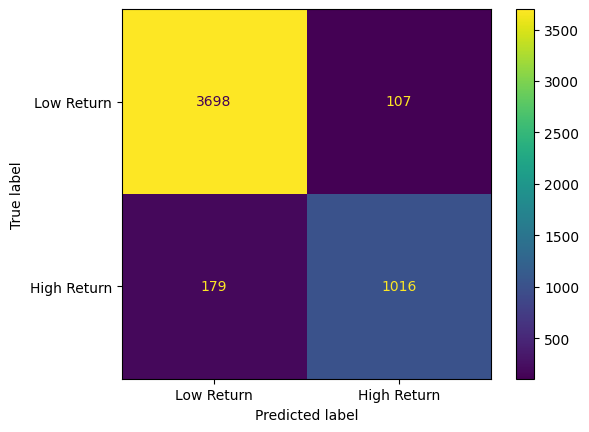

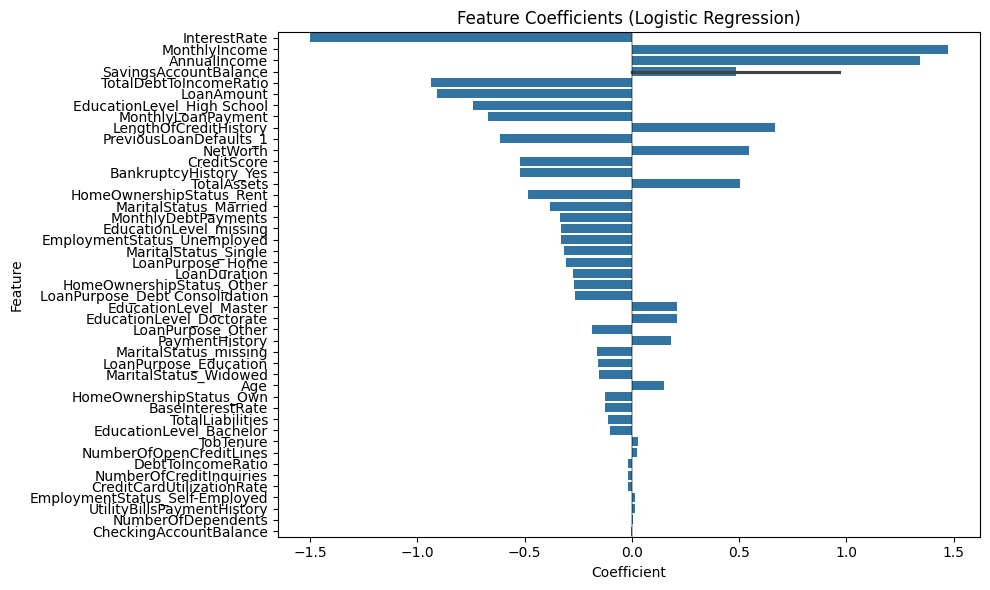


Top 5 features with largest coefficients (absolute value):
                   Feature  Coefficient
23            InterestRate    -1.501021
18           MonthlyIncome     1.473954
2             AnnualIncome     1.344401
14   SavingsAccountBalance     0.966932
25  TotalDebtToIncomeRatio    -0.934035

===== Model Summary =====
Selected model: Logistic Regression
Business goal: Identify which loans to approve
Primary metric: Precision (minimize approving loans likely to be defaulted on)
Test set performance: 0.9047 precision

Key preprocessing decisions:
  Numeric features imputation strategy: median
  Categorical features handled with one-hot encoding
  All numeric features standardized to mean=0, variance=1

Model successfully trained and evaluated!


In [244]:
# Select the best model to move forward with
final_model = best_model.best_estimator_

# Make predictions on test set
y_pred = final_model.predict(X_test)

test_precision = precision_score(y_test, y_pred)
print(f"\n===== Final Model Evaluation =====")
print(f"Test set precision: {test_precision:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:")
ConfusionMatrixDisplay(cm, display_labels=['Low Return', 'High Return']).plot();

# Analyze feature importance or coefficients based on model type
if model_name == "Random Forest":
    # Get the Random Forest model from the pipeline
    rf_model = final_model.named_steps['classifier']
    
    # Get feature names after preprocessing
    preprocessor = final_model.named_steps['preprocessor']
    
    # Get feature names
    feature_names = ['SavingsAccountBalance']
    feature_names.extend(numeric_features)
    
    # For categorical features, get the encoded feature names
    cat_encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
    encoded_cat_features = cat_encoder.get_feature_names_out(categorical_features)
    feature_names.extend(encoded_cat_features)
    
    # Get feature importances
    importances = rf_model.feature_importances_
    
    # Sort features by importance
    feature_imp = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    feature_imp = feature_imp.sort_values('Importance', ascending=False)
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_imp)
    plt.title('Feature Importance (Random Forest)')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 5 most important features:")
    print(feature_imp.head(5))
else:
    # For Logistic Regression, examine coefficients
    lr_model = final_model.named_steps['classifier']

    # Get feature names after preprocessing
    preprocessor = final_model.named_steps['preprocessor']
    
    # Get feature names using same approach
    feature_names = ['SavingsAccountBalance']
    feature_names.extend(numeric_features)
    
    cat_encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
    encoded_cat_features = cat_encoder.get_feature_names_out(categorical_features)
    feature_names.extend(encoded_cat_features)
    
    # Get coefficients
    coefficients = lr_model.coef_[0]
    
    # Create DataFrame of coefficients
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })
    coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)
    
    # Plot coefficients
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df)
    plt.title('Feature Coefficients (Logistic Regression)')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\nTop 5 features with largest coefficients (absolute value):")
    print(coef_df.head(5))

# Summarize modeling decisions
print("\n===== Model Summary =====")
print(f"Selected model: {model_name}")
print("Business goal: Identify which loans to approve")
print("Primary metric: Precision (minimize approving loans likely to be defaulted on)")
print(f"Test set performance: {test_precision:.4f} precision")
print("\nKey preprocessing decisions:")
print(f"  Numeric features imputation strategy: {best_model.best_params_.get('preprocessor__num__imputer__strategy', 'Not specified')}")
print("  Categorical features handled with one-hot encoding")
print("  All numeric features standardized to mean=0, variance=1")

print("\nModel successfully trained and evaluated!")

Because our Logistic Regression model performed best, we can presume that there is a linear relationship between the various features we looked at and the loan approval status. Using precision as our primary metric for model evaluation has also left us with a model with very low rates of false positives, which will prevent large losses from defaulted loans.

The most effective features for prediction in our model are interest rate and income, so a streamlined model or future work would benefit from particular focus on those features. It also tells us which features we can focus on less when trying to reach a wider market for loans.